Nama    : Zuyyina Hawani


Nim     : 09040620070


Kelas   : Data Mining A

<a id="1"></a> <br>
# 📥 Importing Libraries

import library yang digunakan untuk menjalankan program

In [30]:
import numpy as np
import time
import cv2
import os
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

<a id="2"></a> <br> 
# 🗃️ Load Dataset

Mendefinisikan path folder

In [31]:
# Mendefinisikan path ke folder dataset citra
dataset_folder = 'C:/Data Mining/skrips/trpo test/coba'

# Mendefinisikan daftar kelas atau label
labels = ['norm', 'trypo']

Inisialisasi data

In [32]:
# Inisialisasi untuk menyimpan data fitur dan target kedalam data frame
data_fitur = []
data_target = []

# Resizing gambar yang diinginkan 
width = 250
height = 250

In [33]:
# Load gambar untuk menentukan data training dan target
for label in labels:
    label_folder = os.path.join(dataset_folder, label)
    for image_file in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_file)
        image = cv2.imread(image_path)
        
        # Resize gambar untuk menentukan ukuran
        image = cv2.resize(image, (width, height))
        data_fitur.append(image)
        data_target.append(label)

# convert ke dalam numpy array
X_train = np.array(data_fitur)
y_train = np.array(data_target)

# Reshape the training data to (num_samples, num_features)
X_train = X_train.reshape(X_train.shape[0], -1)

Jumlah data dan fitur yang digunakan

In [34]:
print(X_train.shape)
print(y_train.shape)


(400, 187500)
(400,)


Memasukan dataset fitur kedalam data frame

In [35]:
df = pd.DataFrame(X_train).astype(str)
df

,0,1,2,3,4,5,6,7,8,9,...,187490,187491,187492,187493,187494,187495,187496,187497,187498,187499
0,255,250,251,255,250,251,255,250,251,255,...,248,252,247,248,252,247,248,252,247,248
1,250,255,252,248,255,252,253,253,254,255,...,72,52,52,61,42,41,50,52,56,63
2,83,116,135,85,112,133,96,125,139,124,...,253,254,255,253,254,255,253,254,255,253
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,255,210,253,255,210,252,255,211,251,253,...,250,255,211,252,255,211,252,253,211,252
396,249,247,239,248,246,238,249,247,239,248,...,119,91,109,118,105,117,122,112,123,120
397,103,177,216,103,177,216,99,172,212,102,...,57,0,20,62,0,25,72,4,38,89
398,225,241,248,225,241,248,225,241,248,225,...,248,226,244,248,226,244,248,226,244,248


Tambahkan label menggunakan data target

In [36]:
df['Label'] = y_train
df

,0,1,2,3,4,5,6,7,8,9,...,187491,187492,187493,187494,187495,187496,187497,187498,187499,Label
0,255,250,251,255,250,251,255,250,251,255,...,252,247,248,252,247,248,252,247,248,norm
1,250,255,252,248,255,252,253,253,254,255,...,52,52,61,42,41,50,52,56,63,norm
2,83,116,135,85,112,133,96,125,139,124,...,254,255,253,254,255,253,254,255,253,norm
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,norm
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,255,210,253,255,210,252,255,211,251,253,...,255,211,252,255,211,252,253,211,252,trypo
396,249,247,239,248,246,238,249,247,239,248,...,91,109,118,105,117,122,112,123,120,trypo
397,103,177,216,103,177,216,99,172,212,102,...,0,20,62,0,25,72,4,38,89,trypo
398,225,241,248,225,241,248,225,241,248,225,...,226,244,248,226,244,248,226,244,248,trypo


Jumlah masing-masing dataset

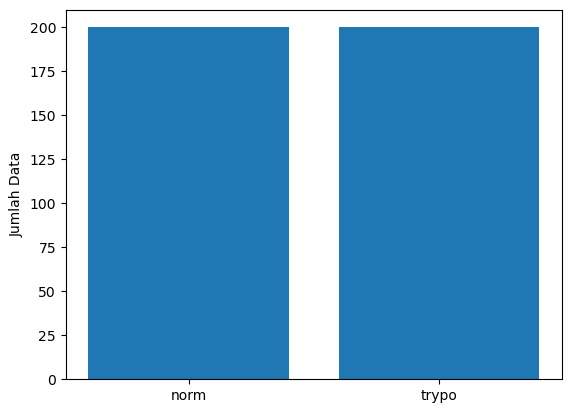

In [37]:
# Menghitung jumlah data untuk setiap nilai target
jumlah_data_target = df['Label'].value_counts()

# Membuat plot bar chart
plt.bar(jumlah_data_target.index, jumlah_data_target.values)

# Memberi label pada sumbu x dan y
plt.xlabel('')
plt.xlabel('')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

Label Encoder digunakan untuk mengubah kolom dataset dari data kategori menjadi data numerik

In [38]:
lLabel = LabelEncoder()
df['Label'] = lLabel.fit_transform(df['Label'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,187491,187492,187493,187494,187495,187496,187497,187498,187499,Label
0,255,250,251,255,250,251,255,250,251,255,...,252,247,248,252,247,248,252,247,248,0
1,250,255,252,248,255,252,253,253,254,255,...,52,52,61,42,41,50,52,56,63,0
2,83,116,135,85,112,133,96,125,139,124,...,254,255,253,254,255,253,254,255,253,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="4"></a> <br>
# ✂️ Train & Test Split

Inisialisasi data X dan y

In [39]:
X = df.drop('Label', axis=1)
y = df['Label']

Split data dengan ukuran 80/20

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = int(time.time()))

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(320, 187500)
(80, 187500)
(320,)
(80,)


Feature Scaling untuk memastikan rentang nilai fitur agar memiliki skala yang serupa

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtrain = sc.transform(Xtrain)

<a id="6"></a> <br>
# 📚 Menggunakan Model PCA

Menggunakan PCA untuk reduksi dimensi

In [42]:
# Jumlah fitur yang diinginkan
n_components = 5
pca = PCA(n_components=n_components)

#PCA untuk data train
data_train_pca = pca.fit_transform(Xtrain)

#PCA untuk data test
data_test_pca = pca.fit_transform(Xtest)

# Cetak hasil train PCA
print("Hasil PCA Data Train")
print(data_train_pca)
print("")

# Cetak hasil test PCA
print("Hasil PCA Data Test")
print(data_test_pca)

Hasil PCA Data Train
[[ 2.29240105 -0.64452599  1.73962403 -0.07898338  1.59371987]
 [ 0.03561403 -2.10497477 -1.18771557 -1.99082551 -0.41964234]
 [ 5.48922858  0.90297444 -0.26275326  0.37236382  0.45108035]
 ...
 [-2.42224485 -1.04538103 -1.39307514  0.69301247  1.85939649]
 [ 1.4106618  -1.40308554  1.11356324  0.4591375  -0.13437372]
 [-0.82603779 -0.17988983 -0.07446571 -0.49936943 -0.89477492]]

Hasil PCA Data Test
[[ 9.98603164e+03 -1.11820508e+03 -2.85685229e+01  9.22036268e+02
  -5.51523347e+03]
 [ 1.12996873e+04 -3.71921326e+03  1.53686433e+03  3.50895891e+03
  -1.34556588e+04]
 [-4.01575034e+04  3.12188667e+03  3.72234554e+03  7.75811055e+02
  -1.24168368e+03]
 [-1.27853624e+04 -1.98446547e+03  2.26142591e+03  3.09963146e+03
  -2.64399332e+03]
 [-5.98895786e+03  6.38271860e+03 -8.25083214e+03  7.47569730e+03
  -7.38089728e+03]
 [ 8.18135445e+03 -1.88449216e+04  6.21874590e+03  5.20262459e+03
   9.09868321e+02]
 [ 1.15945805e+04 -1.42767158e+04 -8.74717798e+03 -2.93102541e+0

<a id="6"></a> <br>
# 📚 Training models

Klasifikasi menggunakan SVM

In [59]:
# Melatih model klasifikasi dengan SVM menggunakan kernel terbaik
svm = SVC(kernel= 'poly')

Training data Train

In [60]:
svm.fit(data_train_pca, ytrain)

# Memprediksi label kelas untuk subset pengujian
y_pred = svm.predict(data_train_pca)

# Menghitung akurasi prediksi
accuracy = accuracy_score(ytrain, y_pred)
print("Presentase Akurasi: {:.2f}%".format(accuracy * 100))

print("Akurasi pada data train:")
print(classification_report(ytrain, y_pred))

Presentase Akurasi: 71.56%
Akurasi pada data train:
              precision    recall  f1-score   support

           0       0.94      0.40      0.56       146
           1       0.66      0.98      0.79       174

    accuracy                           0.72       320
   macro avg       0.80      0.69      0.68       320
weighted avg       0.79      0.72      0.69       320



In [61]:
# Melatih model klasifikasi dengan SVM
svm.fit(data_test_pca, ytest)

# Memprediksi label kelas untuk subset pengujian
y_pred2 = svm.predict(data_test_pca)

# Menghitung akurasi prediksi
accuracy = accuracy_score(ytest, y_pred2)
print("Presentase Akurasi: {:.2f}%".format(accuracy * 100))

print("Akurasi pada data test:")
print(classification_report(ytest, y_pred2))

Presentase Akurasi: 70.00%
Akurasi pada data test:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        54
           1       1.00      0.08      0.14        26

    accuracy                           0.70        80
   macro avg       0.85      0.54      0.48        80
weighted avg       0.79      0.70      0.60        80



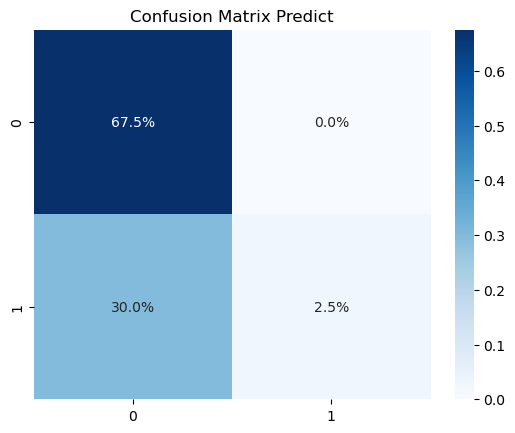

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred2)
sns.heatmap((cm/np.sum(cm)), annot= True, fmt='.1%', cmap='Blues')
plt.title("Confusion Matrix Predict")
plt.show()